In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/HP/Downloads/climate_change.csv",parse_dates = ['date'], index_col = 'date')

In [3]:
df.head()

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06


In [4]:
df.index

DatetimeIndex(['1958-03-06', '1958-04-06', '1958-05-06', '1958-06-06',
               '1958-07-06', '1958-08-06', '1958-09-06', '1958-10-06',
               '1958-11-06', '1958-12-06',
               ...
               '2016-03-06', '2016-04-06', '2016-05-06', '2016-06-06',
               '2016-07-06', '2016-08-06', '2016-09-06', '2016-10-06',
               '2016-11-06', '2016-12-06'],
              dtype='datetime64[ns]', name='date', length=706, freq=None)

Text(0, 0.5, 'CO2 (ppm)')

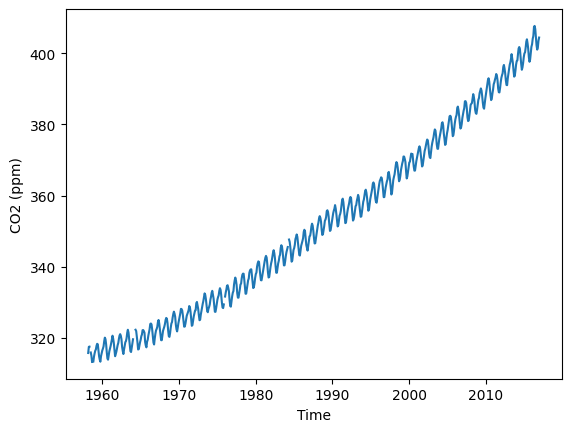

In [5]:
fig, ax = plt.subplots()
ax.plot(df.index, df['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)')

Text(0, 0.5, 'CO2 (ppm)')

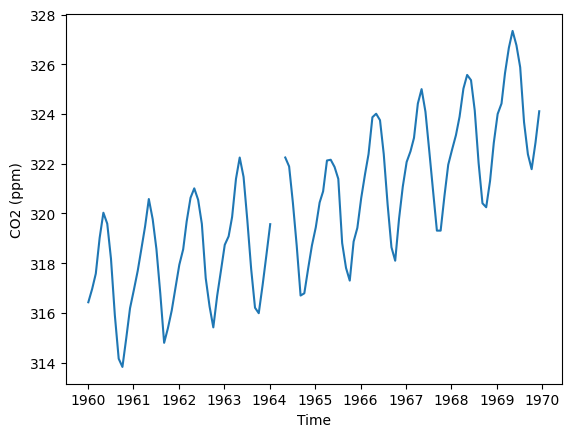

In [6]:
#zooming in on a decade
sixties = df['1960-01-01':'1969-12-31']
fig, ax = plt.subplots()
ax.plot(sixties.index, sixties['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)')

Text(0, 0.5, 'CO2 (ppm)')

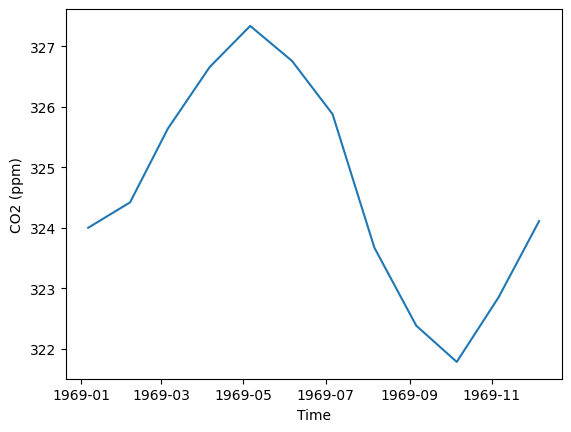

In [7]:
#Zooming in on one year
sixty_nine = df['1969-01-01':'1969-12-31']
fig, ax = plt.subplots()
ax.plot(sixty_nine.index, sixty_nine['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)')

### Plotting time-series with different variables

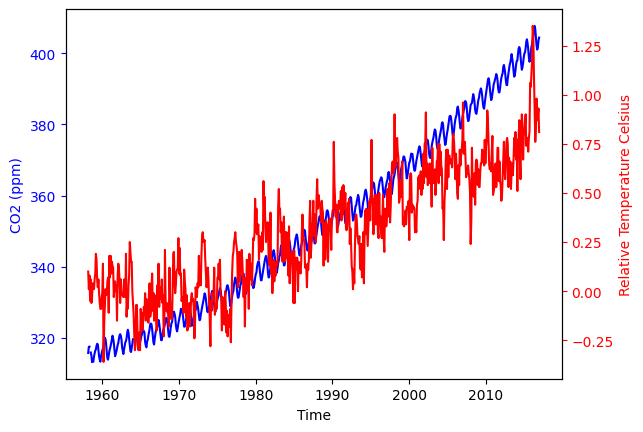

In [8]:
fig, ax = plt.subplots()
ax.plot(df.index, df['co2'],color='blue')
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)',color='blue')
ax.tick_params('y',colors='blue')

# Create another object 'ax2' that shares the same x axis as 'ax'.
ax2 = ax.twinx()
ax2.plot(df.index, df['relative_temp'], color = 'red')
ax2.set_ylabel('Relative Temperature Celsius',color='red')
ax2.tick_params('y', colors='red')

### A function that plots Time - Series

In [9]:
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    axes.plot(x,y, color = color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color = color)
    axes.tick_params('y',colors=color)

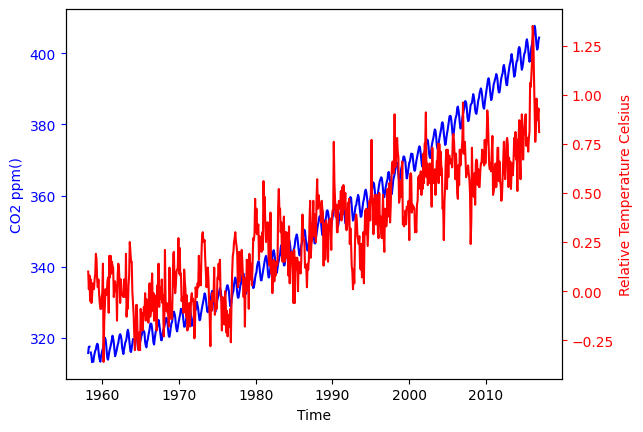

In [10]:
# using the function
fig, ax = plt.subplots()
plot_timeseries(ax, df.index, df['co2'],'blue','Time','CO2 ppm()')

ax2 = ax.twinx()
plot_timeseries(ax2, df.index, df['relative_temp'],'red','Time','Relative Temperature Celsius')
plt.show()

### Annotating Time-Series data

Text(2015-10-06 00:00:00, -0.2, '>1')

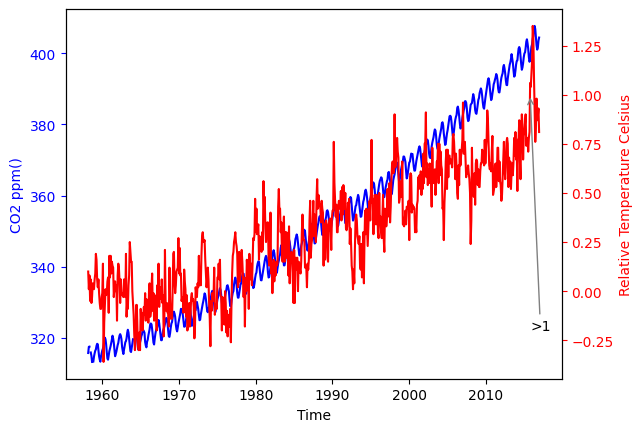

In [11]:
fig, ax = plt.subplots()
plot_timeseries(ax, df.index, df['co2'],'blue','Time','CO2 ppm()')

ax2 = ax.twinx()
plot_timeseries(ax2, df.index, df['relative_temp'],'red','Time','Relative Temperature Celsius')

ax2.annotate('>1', xy = (pd.Timestamp('2015-10-06'),1), xytext = (pd.Timestamp('2015-10-06'),-0.2), arrowprops={'arrowstyle' : '->', 'color':'gray'})

## Quantitative Comparisions

In [12]:
medals = pd.read_csv("C:/Users/HP/Downloads/medals_by_country_2016.csv",index_col = 0)

In [13]:
medals.head()

,Bronze,Gold,Silver
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30


### 1. Bar charts

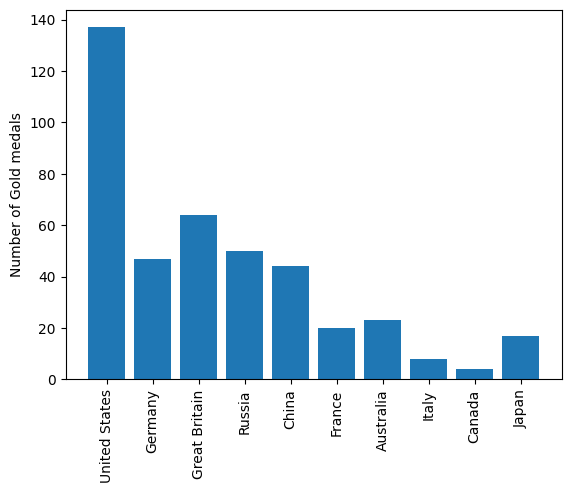

In [14]:
fig, ax = plt.subplots()
ax.bar(medals.index, medals['Gold'])
ax.set_ylabel('Number of Gold medals')
ax.tick_params('x', labelrotation=90)

### 2. Stacked bar charts

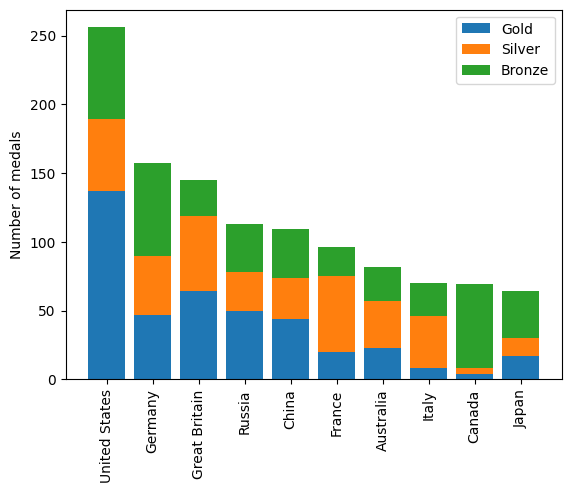

In [15]:
fig, ax = plt.subplots()
ax.bar(medals.index, medals['Gold'], label = 'Gold')
ax.bar(medals.index, medals['Silver'], bottom = medals['Gold'], label = 'Silver')
ax.bar(medals.index, medals['Bronze'], bottom = medals['Gold']+medals['Silver'], label='Bronze')

ax.tick_params('x', labelrotation=90)
ax.set_ylabel("Number of medals")
ax.legend()

In [16]:
medals1 = pd.read_csv("C:/Users/HP/Downloads/summer2016.csv",index_col = 0)
rowing =  medals1[(medals1['Sport'] == 'Rowing') & (medals1['Sex'] == 'M')]
gymnastics = medals1[(medals1['Sport'] == 'Gymnastics') & (medals1['Sex'] == 'M')]
gymnastics.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver
796,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horse Vault,Silver


### 3. Histograms

Text(0, 0.5, 'Number of Observations')

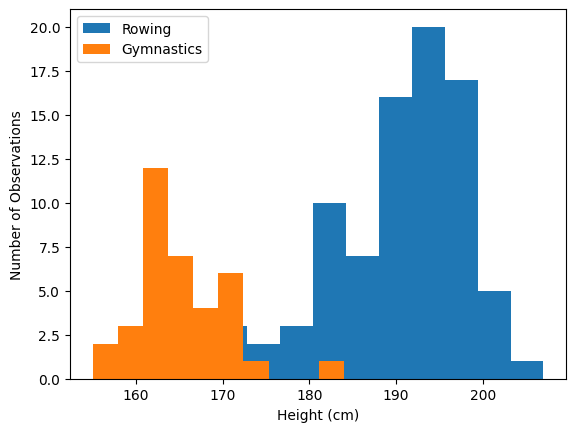

In [17]:
fig, ax = plt.subplots()
ax.hist(rowing['Height'], label='Rowing')
ax.hist(gymnastics['Height'], label = 'Gymnastics')

ax.legend()
ax.set_xlabel('Height (cm)')
ax.set_ylabel('Number of Observations')

Text(0, 0.5, 'Number of Observations')

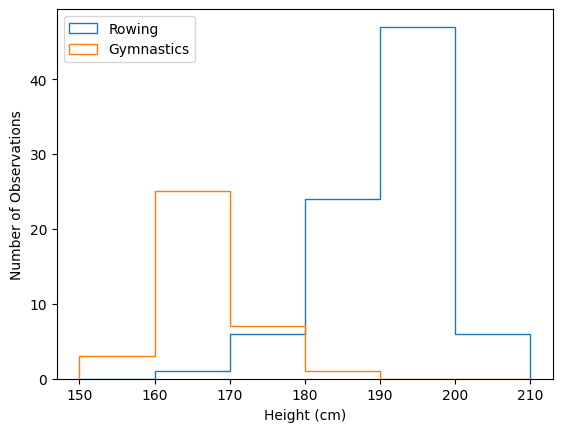

In [18]:
fig, ax = plt.subplots()
ax.hist(rowing['Height'], label='Rowing',histtype='step',bins=[150,160,170,180,190,200,210])
ax.hist(gymnastics['Height'], label = 'Gymnastics',histtype='step',bins=[150,160,170,180,190,200,210])

ax.legend()
ax.set_xlabel('Height (cm)')
ax.set_ylabel('Number of Observations')

## Statistical Plotting

### 1. Adding error bars to a bar chart

<BarContainer object of 1 artists>

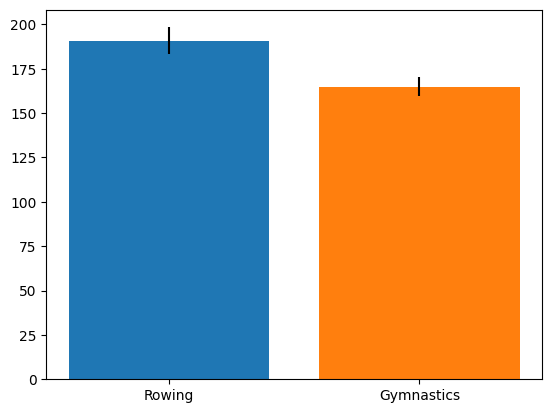

In [19]:
fig, ax = plt.subplots()
ax.bar('Rowing', rowing['Height'].mean(), yerr = rowing['Height'].std())
ax.bar('Gymnastics', gymnastics['Height'].mean(), yerr = gymnastics['Height'].std())

Adding error bars to a line plot is in Introduction to Matplotlib

### 2. Adding box plot


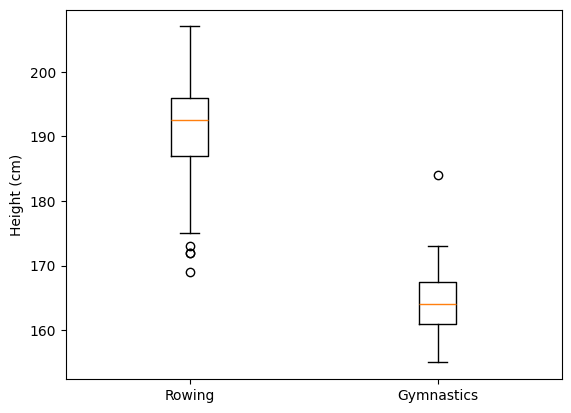

In [20]:
fig, ax = plt.subplots()
ax.boxplot([rowing['Height'], gymnastics['Height']])
ax.set_xticklabels(['Rowing','Gymnastics'])
ax.set_ylabel('Height (cm)')
plt.show()

## Quantitative Comparisions: Scatter Plots

In [21]:
df.head()

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06


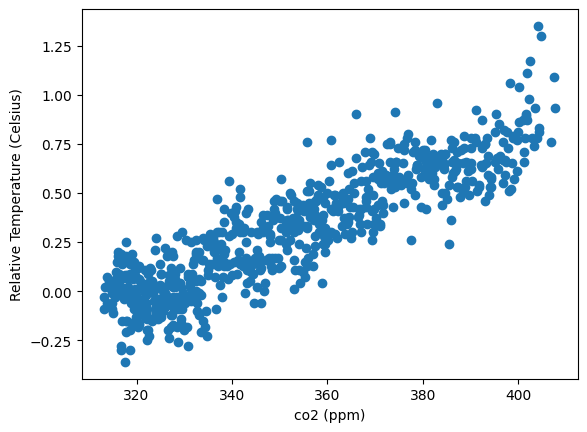

In [22]:
fig, ax = plt.subplots()
ax.scatter(df['co2'], df['relative_temp'])
ax.set_xlabel('co2 (ppm)')
ax.set_ylabel('Relative Temperature (Celsius)')
plt.show()

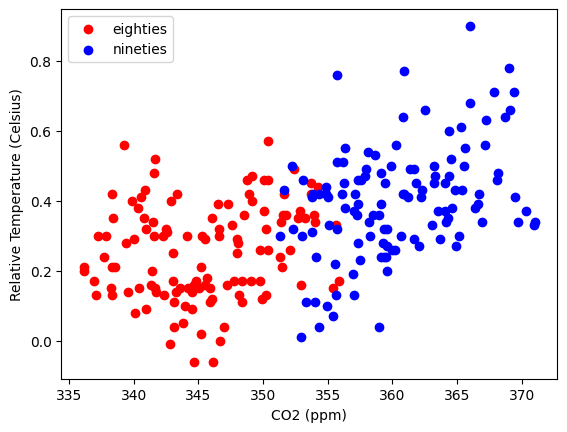

In [24]:
eighties = df['1980-01-01':'1989-12-31']
nineties = df['1990-01-01':'1999-12-31']

fig, ax = plt.subplots()
ax.scatter(eighties['co2'],eighties['relative_temp'], color = 'red', label = 'eighties')
ax.scatter(nineties['co2'],nineties['relative_temp'], color = 'blue', label = 'nineties')
ax.legend()

ax.set_xlabel('CO2 (ppm)')
ax.set_ylabel('Relative Temperature (Celsius)')
plt.show()

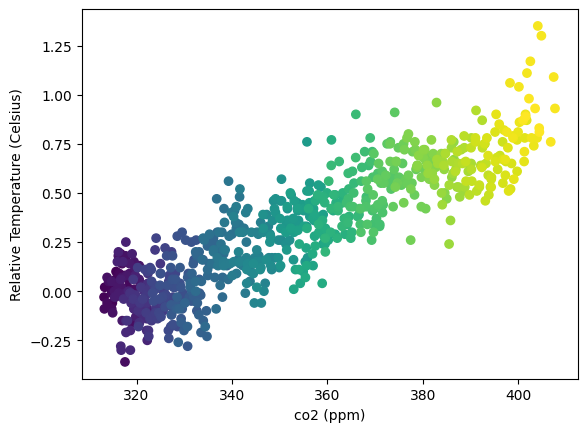

In [26]:
fig, ax = plt.subplots()
ax.scatter(df['co2'], df['relative_temp'], c=df.index)
ax.set_xlabel('co2 (ppm)')
ax.set_ylabel('Relative Temperature (Celsius)')
plt.show()

# save figure
fig.savefig('relative_temp.png')
# fig.savefig('relative_temp.png', dpi = 300)
# fig.savefig('relative_temp.jpg', quality = 50) quality -> 1 to 100
# fig.savefig('relative_temp.svg')

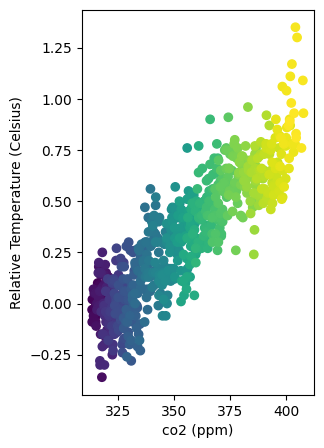

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches([3,5])
ax.scatter(df['co2'], df['relative_temp'], c=df.index)
ax.set_xlabel('co2 (ppm)')
ax.set_ylabel('Relative Temperature (Celsius)')
plt.show()

## Automating Figures from data

In [31]:
medals1.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver


### Create bar chart of height of players for each sport

In [36]:
sports = medals1['Sport'].unique()[:10]
sports

array(['Rowing', 'Taekwondo', 'Handball', 'Wrestling', 'Gymnastics',
       'Swimming', 'Basketball', 'Boxing', 'Volleyball', 'Athletics'],
      dtype=object)

C:\Users\HP\AppData\Local\Temp\ipykernel_10520\2715558005.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sports, rotation=90)


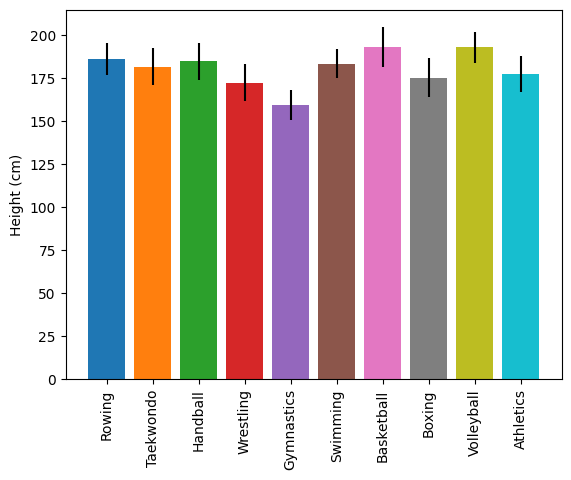

In [38]:
fig, ax = plt.subplots()

for sport in sports:
    df_sport = medals1[medals1['Sport'] == sport]
    ax.bar(sport, df_sport['Height'].mean(), yerr = df_sport['Height'].std())

ax.set_xticklabels(sports, rotation=90)
ax.set_ylabel('Height (cm)')
plt.show()